In [46]:
!pip install kagglehub

In [47]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("preethamgouda/banglore-city-traffic-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'banglore-city-traffic-dataset' dataset.
Path to dataset files: /kaggle/input/banglore-city-traffic-dataset


In [49]:
import pandas as pd

df = pd.read_csv(path + "/Banglore_traffic_Dataset.csv")
df.head()

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No


In [50]:
df = df.dropna()
df = df.drop_duplicates()

# Date se relation nahi h it's better to drop it.
df = df.drop(columns=["Date"])

# We can't and probably shouldnt drop this.
#  0   Area Name                           8936 non-null   object
#  1   Road/Intersection Name              8936 non-null   object
# Weather like rain can depend on them, The Area might have drainage problem that can cause traffic in rain for example.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Area Name                           8936 non-null   object 
 1   Road/Intersection Name              8936 non-null   object 
 2   Traffic Volume                      8936 non-null   int64  
 3   Average Speed                       8936 non-null   float64
 4   Travel Time Index                   8936 non-null   float64
 5   Congestion Level                    8936 non-null   float64
 6   Road Capacity Utilization           8936 non-null   float64
 7   Incident Reports                    8936 non-null   int64  
 8   Environmental Impact                8936 non-null   float64
 9   Public Transport Usage              8936 non-null   float64
 10  Traffic Signal Compliance           8936 non-null   float64
 11  Parking Usage                       8936 no

In [51]:
df["Roadwork and Construction Activity"] = (
    df["Roadwork and Construction Activity"]
    .str.strip()
    .str.lower()                         
    .map({"yes": 1, "no": 0})
)

df.head()
# df['Roadwork and Construction Activity'].unique()

,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,0
1,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,0
2,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,0
3,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,0
4,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,0


**One-hot encoding** means:

* A categorical value is turned into **multiple binary columns**
* Exactly **one column is 1**, the rest are **0**

Example:

```
Weather
Clear
Rain
Fog
```

After one-hot encoding:

```
Weather_Clear  Weather_Rain  Weather_Fog
1              0             0
0              1             0
0              0             1
```

Used when categories have **no numeric order**.


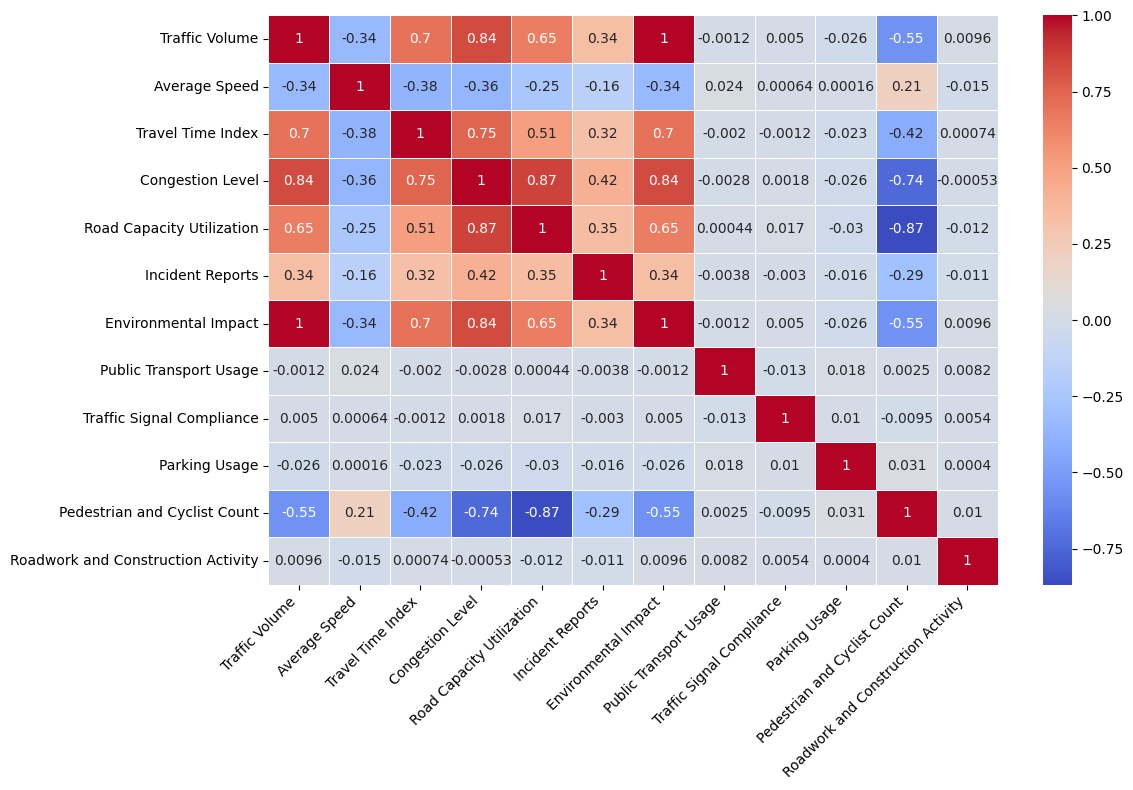

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

df_numeric = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(
    df_numeric.corr(),
    annot=True,
    cmap="coolwarm",
    linewidths=0.5
)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [53]:
# Define target
y = df["Average Speed"].copy()

X = df.drop(columns=[
    "Average Speed",
    "Congestion Level",
    "Environmental Impact",
    "Area Name",
    "Road/Intersection Name",
])

X = pd.get_dummies(X, columns=["Weather Conditions"], drop_first=True)

X.shape

(8936, 13)

In [54]:
X.head()

,Traffic Volume,Travel Time Index,Road Capacity Utilization,Incident Reports,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Roadwork and Construction Activity,Weather Conditions_Fog,Weather Conditions_Overcast,Weather Conditions_Rain,Weather Conditions_Windy
0,50590,1.500000,100.000000,0,70.632330,84.044600,85.403629,111,0,False,False,False,False
1,30825,1.500000,100.000000,1,41.924899,91.407038,59.983689,100,0,False,False,False,False
2,7399,1.039069,36.396525,0,44.662384,61.375541,95.466020,189,0,False,False,False,False
3,60874,1.500000,100.000000,1,32.773123,75.547092,63.567452,111,0,False,False,False,False
4,57292,1.500000,100.000000,3,35.092601,64.634762,93.155171,104,0,False,False,False,False


In [55]:
y.describe()

,Average Speed
count,8936.000000
mean,39.447427
std,10.707244
min,20.000000
25%,31.775825
50%,39.199368
75%,46.644517
max,89.790843


Q. What to use ML or DL ?

A. ML, not DL - **Use classical ML algorithms.**

Why ?

1. Tabular data
2. ~9k rows
3. No images, no sequences

DL adds nothing, only complexity

In [56]:
from sklearn.model_selection import train_test_split, cross_val_score

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

In [57]:
# Stacking
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    random_state=42
)

rf.fit(X_train, y_train)
gbr.fit(X_train, y_train)

print("Random Forest R²:", rf.score(X_test, y_test))
print("Gradient Boosting R²:", gbr.score(X_test, y_test))

cv_rf = cross_val_score(rf, X, y, cv=5, scoring='r2')
cv_gbr = cross_val_score(gbr, X, y, cv=5, scoring='r2')
print(f"\nRF CV R² mean: {np.mean(cv_rf):.4f} ± {np.std(cv_rf):.4f}")
print(f"GBR CV R² mean: {np.mean(cv_gbr):.4f} ± {np.std(cv_gbr):.4f}")

Random Forest R²: 0.14506631589817298
Gradient Boosting R²: 0.15521222197605755

RF CV R² mean: 0.1467 ± 0.0127
GBR CV R² mean: 0.1523 ± 0.0123


In [ ]:
feat_imp = pd.Series(gbr.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_imp.head(10)

,0
Travel Time Index,0.370665
Traffic Volume,0.274266
Public Transport Usage,0.086855
Parking Usage,0.080100
Traffic Signal Compliance,0.073537
Pedestrian and Cyclist Count,0.049714
Road Capacity Utilization,0.031226
Incident Reports,0.016215
Weather Conditions_Overcast,0.005729
Roadwork and Construction Activity,0.004160


In [59]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

bag = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

bag.fit(X_train, y_train)
print("Bagging R2:", bag.score(X_test, y_test))

Bagging R2: 0.14560411688767338


In [60]:
bag_gbr = BaggingRegressor(
    estimator=GradientBoostingRegressor(random_state=42),
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)

bag_gbr.fit(X_train, y_train)
print("Bagged GBR R2:", bag_gbr.score(X_test, y_test))

Bagged GBR R2: 0.17771291290041724


In [61]:
gbr = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=3,
    random_state=42
)

gbr.fit(X_train, y_train)
print("GBR R2:", gbr.score(X_test, y_test))

GBR R2: 0.17007986393699892


In [62]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=3),
    n_estimators=300,
    learning_rate=0.05,
    random_state=42
)

ada.fit(X_train, y_train)
print("AdaBoost R2 -", ada.score(X_test, y_test))

AdaBoost R2 - 0.18123159241361364
